In [19]:
!pip -q install datasets huggingface_hub pyarrow pandas numpy matplotlib


In [20]:
import os
import pandas as pd
import matplotlib.pyplot as plt

from datasets import load_dataset

pd.set_option("display.max_columns", 200)
pd.set_option("display.width", 140)


METR-LA is a traffic sensor network in Los Angeles.

Nodes = fixed road sensors (loop detectors)

Each node measures traffic conditions at regular intervals
(typically speed, sometimes flow)

Sensors are arranged on a road graph (nodes + edges)

At every timestamp, you observe a snapshot of the city’s traffic state.

So this dataset is not:

user-level

event-level

classification

It is spatiotemporal forecasting.

In [21]:
# downloads data from huggingface
token = os.environ.get("HF_TOKEN")
ds = load_dataset("witgaw/METR-LA")
ds


DatasetDict({
    train: Dataset({
        features: ['node_id', 't0_timestamp', 'x_t-11_d0', 'x_t-11_d1', 'x_t-10_d0', 'x_t-10_d1', 'x_t-9_d0', 'x_t-9_d1', 'x_t-8_d0', 'x_t-8_d1', 'x_t-7_d0', 'x_t-7_d1', 'x_t-6_d0', 'x_t-6_d1', 'x_t-5_d0', 'x_t-5_d1', 'x_t-4_d0', 'x_t-4_d1', 'x_t-3_d0', 'x_t-3_d1', 'x_t-2_d0', 'x_t-2_d1', 'x_t-1_d0', 'x_t-1_d1', 'x_t+0_d0', 'x_t+0_d1', 'y_t+1_d0', 'y_t+1_d1', 'y_t+2_d0', 'y_t+2_d1', 'y_t+3_d0', 'y_t+3_d1', 'y_t+4_d0', 'y_t+4_d1', 'y_t+5_d0', 'y_t+5_d1', 'y_t+6_d0', 'y_t+6_d1', 'y_t+7_d0', 'y_t+7_d1', 'y_t+8_d0', 'y_t+8_d1', 'y_t+9_d0', 'y_t+9_d1', 'y_t+10_d0', 'y_t+10_d1', 'y_t+11_d0', 'y_t+11_d1', 'y_t+12_d0', 'y_t+12_d1'],
        num_rows: 4962618
    })
    validation: Dataset({
        features: ['node_id', 't0_timestamp', 'x_t-11_d0', 'x_t-11_d1', 'x_t-10_d0', 'x_t-10_d1', 'x_t-9_d0', 'x_t-9_d1', 'x_t-8_d0', 'x_t-8_d1', 'x_t-7_d0', 'x_t-7_d1', 'x_t-6_d0', 'x_t-6_d1', 'x_t-5_d0', 'x_t-5_d1', 'x_t-4_d0', 'x_t-4_d1', 'x_t-3_d0', 'x_t-3_d1', 'x_t-2_

In [22]:
def peek_split(split="train", n=5):
    df = ds[split].select(range(min(n, ds[split].num_rows))).to_pandas()
    return df

sample = peek_split("train", 20)
display(sample.head())

print("Columns:", list(sample.columns))
print(sample.dtypes)

# Detect candidate numeric value columns (excluding IDs / timestamps)
EXCLUDE = {"node_id", "t0_timestamp"}
value_candidates = [
    c for c in sample.columns
    if c not in EXCLUDE and pd.api.types.is_numeric_dtype(sample[c])
]

value_candidates


,node_id,t0_timestamp,x_t-11_d0,x_t-11_d1,x_t-10_d0,x_t-10_d1,x_t-9_d0,x_t-9_d1,x_t-8_d0,x_t-8_d1,x_t-7_d0,x_t-7_d1,x_t-6_d0,x_t-6_d1,x_t-5_d0,x_t-5_d1,x_t-4_d0,x_t-4_d1,x_t-3_d0,x_t-3_d1,x_t-2_d0,x_t-2_d1,x_t-1_d0,x_t-1_d1,x_t+0_d0,x_t+0_d1,y_t+1_d0,y_t+1_d1,y_t+2_d0,y_t+2_d1,y_t+3_d0,y_t+3_d1,y_t+4_d0,y_t+4_d1,y_t+5_d0,y_t+5_d1,y_t+6_d0,y_t+6_d1,y_t+7_d0,y_t+7_d1,y_t+8_d0,y_t+8_d1,y_t+9_d0,y_t+9_d1,y_t+10_d0,y_t+10_d1,y_t+11_d0,y_t+11_d1,y_t+12_d0,y_t+12_d1
0,0,2012-03-01T00:55:00,64.375,0.0,62.666667,0.003472,64.00,0.006944,0.0,0.010417,0.0,0.013889,57.333333,0.017361,66.500,0.020833,63.625,0.024306,68.750,0.027778,63.500,0.03125,65.222222,0.034722,62.250,0.038194,61.125,0.041667,58.555556,0.045139,63.625,0.048611,66.777778,0.052083,55.875,0.055556,64.333333,0.059028,63.888889,0.0625,63.125,0.065972,62.125,0.069444,61.500,0.072917,63.222222,0.076389,65.000,0.079861
1,1,2012-03-01T00:55:00,67.625,0.0,68.555556,0.003472,63.75,0.006944,0.0,0.010417,0.0,0.013889,69.000000,0.017361,63.875,0.020833,67.250,0.024306,65.250,0.027778,61.500,0.03125,63.666667,0.034722,67.750,0.038194,67.000,0.041667,62.666667,0.045139,67.000,0.048611,65.555556,0.052083,65.500,0.055556,66.000000,0.059028,61.555556,0.0625,63.875,0.065972,61.250,0.069444,62.000,0.072917,64.111111,0.076389,63.000,0.079861
2,2,2012-03-01T00:55:00,67.125,0.0,65.444444,0.003472,60.00,0.006944,0.0,0.010417,0.0,0.013889,67.666667,0.017361,67.875,0.020833,63.250,0.024306,63.500,0.027778,62.500,0.03125,65.111111,0.034722,66.875,0.038194,58.500,0.041667,65.777778,0.045139,55.000,0.048611,68.111111,0.052083,60.750,0.055556,68.222222,0.059028,68.111111,0.0625,65.375,0.065972,60.750,0.069444,62.125,0.072917,64.333333,0.076389,69.000,0.079861
3,3,2012-03-01T00:55:00,61.500,0.0,62.444444,0.003472,59.00,0.006944,0.0,0.010417,0.0,0.013889,61.666667,0.017361,62.375,0.020833,60.500,0.024306,63.000,0.027778,58.125,0.03125,61.111111,0.034722,60.000,0.038194,62.250,0.041667,59.777778,0.045139,59.125,0.048611,59.888889,0.052083,57.250,0.055556,64.777778,0.059028,57.666667,0.0625,60.250,0.065972,61.375,0.069444,59.375,0.072917,59.888889,0.076389,58.875,0.079861
4,4,2012-03-01T00:55:00,66.875,0.0,64.444444,0.003472,66.50,0.006944,0.0,0.010417,0.0,0.013889,67.333333,0.017361,64.375,0.020833,57.375,0.024306,65.125,0.027778,66.625,0.03125,66.555556,0.034722,64.750,0.038194,66.375,0.041667,66.888889,0.045139,67.625,0.048611,61.333333,0.052083,67.875,0.055556,68.333333,0.059028,65.000000,0.0625,62.500,0.065972,59.125,0.069444,62.625,0.072917,67.000000,0.076389,67.875,0.079861


Columns: ['node_id', 't0_timestamp', 'x_t-11_d0', 'x_t-11_d1', 'x_t-10_d0', 'x_t-10_d1', 'x_t-9_d0', 'x_t-9_d1', 'x_t-8_d0', 'x_t-8_d1', 'x_t-7_d0', 'x_t-7_d1', 'x_t-6_d0', 'x_t-6_d1', 'x_t-5_d0', 'x_t-5_d1', 'x_t-4_d0', 'x_t-4_d1', 'x_t-3_d0', 'x_t-3_d1', 'x_t-2_d0', 'x_t-2_d1', 'x_t-1_d0', 'x_t-1_d1', 'x_t+0_d0', 'x_t+0_d1', 'y_t+1_d0', 'y_t+1_d1', 'y_t+2_d0', 'y_t+2_d1', 'y_t+3_d0', 'y_t+3_d1', 'y_t+4_d0', 'y_t+4_d1', 'y_t+5_d0', 'y_t+5_d1', 'y_t+6_d0', 'y_t+6_d1', 'y_t+7_d0', 'y_t+7_d1', 'y_t+8_d0', 'y_t+8_d1', 'y_t+9_d0', 'y_t+9_d1', 'y_t+10_d0', 'y_t+10_d1', 'y_t+11_d0', 'y_t+11_d1', 'y_t+12_d0', 'y_t+12_d1']
node_id           int64
t0_timestamp     object
x_t-11_d0       float64
x_t-11_d1       float64
x_t-10_d0       float64
x_t-10_d1       float64
x_t-9_d0        float64
x_t-9_d1        float64
x_t-8_d0        float64
x_t-8_d1        float64
x_t-7_d0        float64
x_t-7_d1        float64
x_t-6_d0        float64
x_t-6_d1        float64
x_t-5_d0        float64
x_t-5_d1        f

['x_t-11_d0',
 'x_t-11_d1',
 'x_t-10_d0',
 'x_t-10_d1',
 'x_t-9_d0',
 'x_t-9_d1',
 'x_t-8_d0',
 'x_t-8_d1',
 'x_t-7_d0',
 'x_t-7_d1',
 'x_t-6_d0',
 'x_t-6_d1',
 'x_t-5_d0',
 'x_t-5_d1',
 'x_t-4_d0',
 'x_t-4_d1',
 'x_t-3_d0',
 'x_t-3_d1',
 'x_t-2_d0',
 'x_t-2_d1',
 'x_t-1_d0',
 'x_t-1_d1',
 'x_t+0_d0',
 'x_t+0_d1',
 'y_t+1_d0',
 'y_t+1_d1',
 'y_t+2_d0',
 'y_t+2_d1',
 'y_t+3_d0',
 'y_t+3_d1',
 'y_t+4_d0',
 'y_t+4_d1',
 'y_t+5_d0',
 'y_t+5_d1',
 'y_t+6_d0',
 'y_t+6_d1',
 'y_t+7_d0',
 'y_t+7_d1',
 'y_t+8_d0',
 'y_t+8_d1',
 'y_t+9_d0',
 'y_t+9_d1',
 'y_t+10_d0',
 'y_t+10_d1',
 'y_t+11_d0',
 'y_t+11_d1',
 'y_t+12_d0',
 'y_t+12_d1']

In [23]:
# Split timestamp sanity check (time ordering & overlaps)
def split_ts_summary(split):
    ts = pd.to_datetime(pd.Series(ds[split].unique("t0_timestamp")), errors="coerce").dropna()
    return {
        "split": split,
        "rows": ds[split].num_rows,
        "ts_min": ts.min() if len(ts) else pd.NaT,
        "ts_max": ts.max() if len(ts) else pd.NaT,
        "unique_ts": len(ts),
    }

summ = pd.DataFrame([split_ts_summary(s) for s in ["train", "validation", "test"]])
summ


,split,rows,ts_min,ts_max,unique_ts
0,train,4962618,2012-03-01 00:55:00,2012-05-23 06:40:00,23974
1,validation,708975,2012-05-23 06:45:00,2012-06-04 04:05:00,3425
2,test,1417950,2012-06-04 04:10:00,2012-06-27 22:55:00,6850


In [24]:
# Overlap checks (ideally: train < validation < test)
tr_max = summ.loc[summ["split"]=="train", "ts_max"].iloc[0]
va_min = summ.loc[summ["split"]=="validation", "ts_min"].iloc[0]
va_max = summ.loc[summ["split"]=="validation", "ts_max"].iloc[0]
te_min = summ.loc[summ["split"]=="test", "ts_min"].iloc[0]

print("train overlaps validation?", tr_max >= va_min)
print("validation overlaps test?", va_max >= te_min)


train overlaps validation? False
validation overlaps test? False


In [25]:
# Subsample for faster EDA; full train would work but is slower
SPLIT_FOR_EDA = "train"
N_ROWS = 500_000
K_TIMESTAMPS = 500

tmp = ds[SPLIT_FOR_EDA].select(range(min(N_ROWS, ds[SPLIT_FOR_EDA].num_rows))).to_pandas()
tmp["t0_timestamp"] = pd.to_datetime(tmp["t0_timestamp"], errors="coerce")

ordered_ts = pd.unique(tmp["t0_timestamp"].dropna())

if len(ordered_ts) < (K_TIMESTAMPS + 1):
    raise ValueError(f"Not enough timestamps in first {N_ROWS:,} rows for {K_TIMESTAMPS} complete timesteps.")

# Drop last timestamp (row slicing may cut it partially)
safe_ts = ordered_ts[: K_TIMESTAMPS + 1][:-1]
df = tmp[tmp["t0_timestamp"].isin(safe_ts)].copy()
df["node_id"] = pd.to_numeric(df["node_id"], errors="coerce").astype("Int64")

print("EDA df shape:", df.shape)
df.head()


EDA df shape: (103500, 50)


,node_id,t0_timestamp,x_t-11_d0,x_t-11_d1,x_t-10_d0,x_t-10_d1,x_t-9_d0,x_t-9_d1,x_t-8_d0,x_t-8_d1,x_t-7_d0,x_t-7_d1,x_t-6_d0,x_t-6_d1,x_t-5_d0,x_t-5_d1,x_t-4_d0,x_t-4_d1,x_t-3_d0,x_t-3_d1,x_t-2_d0,x_t-2_d1,x_t-1_d0,x_t-1_d1,x_t+0_d0,x_t+0_d1,y_t+1_d0,y_t+1_d1,y_t+2_d0,y_t+2_d1,y_t+3_d0,y_t+3_d1,y_t+4_d0,y_t+4_d1,y_t+5_d0,y_t+5_d1,y_t+6_d0,y_t+6_d1,y_t+7_d0,y_t+7_d1,y_t+8_d0,y_t+8_d1,y_t+9_d0,y_t+9_d1,y_t+10_d0,y_t+10_d1,y_t+11_d0,y_t+11_d1,y_t+12_d0,y_t+12_d1
0,0,2012-03-01 00:55:00,64.375,0.0,62.666667,0.003472,64.00,0.006944,0.0,0.010417,0.0,0.013889,57.333333,0.017361,66.500,0.020833,63.625,0.024306,68.750,0.027778,63.500,0.03125,65.222222,0.034722,62.250,0.038194,61.125,0.041667,58.555556,0.045139,63.625,0.048611,66.777778,0.052083,55.875,0.055556,64.333333,0.059028,63.888889,0.0625,63.125,0.065972,62.125,0.069444,61.500,0.072917,63.222222,0.076389,65.000,0.079861
1,1,2012-03-01 00:55:00,67.625,0.0,68.555556,0.003472,63.75,0.006944,0.0,0.010417,0.0,0.013889,69.000000,0.017361,63.875,0.020833,67.250,0.024306,65.250,0.027778,61.500,0.03125,63.666667,0.034722,67.750,0.038194,67.000,0.041667,62.666667,0.045139,67.000,0.048611,65.555556,0.052083,65.500,0.055556,66.000000,0.059028,61.555556,0.0625,63.875,0.065972,61.250,0.069444,62.000,0.072917,64.111111,0.076389,63.000,0.079861
2,2,2012-03-01 00:55:00,67.125,0.0,65.444444,0.003472,60.00,0.006944,0.0,0.010417,0.0,0.013889,67.666667,0.017361,67.875,0.020833,63.250,0.024306,63.500,0.027778,62.500,0.03125,65.111111,0.034722,66.875,0.038194,58.500,0.041667,65.777778,0.045139,55.000,0.048611,68.111111,0.052083,60.750,0.055556,68.222222,0.059028,68.111111,0.0625,65.375,0.065972,60.750,0.069444,62.125,0.072917,64.333333,0.076389,69.000,0.079861
3,3,2012-03-01 00:55:00,61.500,0.0,62.444444,0.003472,59.00,0.006944,0.0,0.010417,0.0,0.013889,61.666667,0.017361,62.375,0.020833,60.500,0.024306,63.000,0.027778,58.125,0.03125,61.111111,0.034722,60.000,0.038194,62.250,0.041667,59.777778,0.045139,59.125,0.048611,59.888889,0.052083,57.250,0.055556,64.777778,0.059028,57.666667,0.0625,60.250,0.065972,61.375,0.069444,59.375,0.072917,59.888889,0.076389,58.875,0.079861
4,4,2012-03-01 00:55:00,66.875,0.0,64.444444,0.003472,66.50,0.006944,0.0,0.010417,0.0,0.013889,67.333333,0.017361,64.375,0.020833,57.375,0.024306,65.125,0.027778,66.625,0.03125,66.555556,0.034722,64.750,0.038194,66.375,0.041667,66.888889,0.045139,67.625,0.048611,61.333333,0.052083,67.875,0.055556,68.333333,0.059028,65.000000,0.0625,62.500,0.065972,59.125,0.069444,62.625,0.072917,67.000000,0.076389,67.875,0.079861


In [26]:
# Key-column null stats
{
    "t0_timestamp_NaT_rate": float(df["t0_timestamp"].isna().mean()),
    "node_id_nunique": int(df["node_id"].nunique()),
    "node_id_min": int(df["node_id"].min()),
    "node_id_max": int(df["node_id"].max()),
}


{'t0_timestamp_NaT_rate': 0.0,
 'node_id_nunique': 207,
 'node_id_min': 0,
 'node_id_max': 206}

In [27]:
# Key integrity: duplicates & per-(timestamp,node) uniqueness
dup_ct = df.duplicated(["node_id", "t0_timestamp"]).sum()
dup_rate = dup_ct / len(df) if len(df) else 0
print("Duplicate (node_id, t0_timestamp): count =", dup_ct, ", rate =", f"{dup_rate:.4f}")


Duplicate (node_id, t0_timestamp): count = 0 , rate = 0.0000


In [28]:
# Missing values check (per-column rate, top 30)
na = df.isna().mean().sort_values(ascending=False)
na.head(30)


node_id         0.0
y_t+6_d1        0.0
y_t+1_d1        0.0
y_t+2_d0        0.0
y_t+2_d1        0.0
y_t+3_d0        0.0
y_t+3_d1        0.0
y_t+4_d0        0.0
y_t+4_d1        0.0
y_t+5_d0        0.0
y_t+5_d1        0.0
y_t+6_d0        0.0
y_t+7_d0        0.0
t0_timestamp    0.0
y_t+7_d1        0.0
y_t+8_d0        0.0
y_t+8_d1        0.0
y_t+9_d0        0.0
y_t+9_d1        0.0
y_t+10_d0       0.0
y_t+10_d1       0.0
y_t+11_d0       0.0
y_t+11_d1       0.0
y_t+12_d0       0.0
y_t+1_d0        0.0
x_t+0_d1        0.0
x_t+0_d0        0.0
x_t-1_d1        0.0
x_t-11_d0       0.0
x_t-11_d1       0.0
dtype: float64

In [29]:
# Time structure (with no-bad-ts message)
nodes_per_t = df.groupby("t0_timestamp")["node_id"].nunique()
print(nodes_per_t.describe())

expected_nodes = int(nodes_per_t.mode().iloc[0])
bad_ts = nodes_per_t[nodes_per_t < expected_nodes].sort_values()
print("Expected nodes per timestamp:", expected_nodes)

if len(bad_ts) == 0:
    print("No timestamps with missing nodes.")
else:
    display(bad_ts.head(20))

uniq_t = pd.Series(df["t0_timestamp"].drop_duplicates().sort_values().to_numpy())
deltas = uniq_t.diff().dropna()
infer = pd.infer_freq(uniq_t)
common_delta = deltas.mode().iloc[0] if len(deltas) else None

print("infer_freq:", infer)
print("most common delta:", common_delta)
display(deltas.value_counts().head(10))

count    500.0
mean     207.0
std        0.0
min      207.0
25%      207.0
50%      207.0
75%      207.0
max      207.0
Name: node_id, dtype: float64
Expected nodes per timestamp: 207
No timestamps with missing nodes.
infer_freq: 5min
most common delta: 0 days 00:05:00


0 days 00:05:00    499
Name: count, dtype: int64

In [30]:
# Y is defined from the target column.
# Y = core.pivot(index="t0_timestamp", columns="node_id", values=TARGET_COL)
TARGET_COL = "x_t-11_d0"

In [31]:
# Pivot to Y and basic stats
core = df[["t0_timestamp", "node_id", TARGET_COL]].dropna(subset=["t0_timestamp", "node_id"]).copy()
core["node_id"] = core["node_id"].astype(int)
Y = core.pivot(index="t0_timestamp", columns="node_id", values=TARGET_COL).sort_index()

print("Y shape [T, N] =", Y.shape)
print("Missing rate in Y:", float(Y.isna().mean().mean()))
Y.head()

Y shape [T, N] = (500, 207)
Missing rate in Y: 0.0


node_id,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,...,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206
t0_timestamp,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2012-03-01 00:55:00,64.375000,67.625000,67.125000,61.500000,66.875000,68.750000,65.125,67.125,59.625000,62.750000,55.500000,66.500000,64.250000,68.500000,60.375000,67.500000,37.75,63.125000,59.750000,62.125000,67.250000,41.250000,54.625000,58.125000,65.125000,64.250000,61.250000,62.750000,66.875000,47.375000,57.000000,67.750000,65.125,66.875000,64.000000,62.000000,64.375,60.750000,60.750,62.375000,64.500000,66.000000,62.000000,64.875000,55.875000,67.750000,63.000000,60.125000,60.250000,62.250000,42.250000,48.250000,65.125,63.500,55.750000,60.500000,51.571429,60.250000,63.875000,59.875000,64.625000,64.000000,52.500000,66.250000,68.250000,68.875000,66.375000,64.500000,67.875000,67.250000,63.125000,66.250000,64.625000,59.125000,68.250000,52.250000,58.125000,61.250000,66.125000,69.375000,69.750000,63.500000,64.25,68.000,56.875000,64.375000,65.250000,65.750000,61.250000,63.625000,67.000000,55.250000,66.875000,65.375,65.125000,57.625000,69.125000,66.500000,62.000000,67.375000,...,66.875000,63.625000,55.750000,67.375000,65.750000,63.125000,66.000000,68.625,61.500000,67.125000,69.250000,65.375000,68.375000,61.375000,53.750000,65.250000,69.375000,62.125,50.125000,61.750000,66.875000,67.125000,58.50,66.125000,66.375000,65.750000,61.750000,67.250000,65.000000,66.375000,63.875000,67.875000,63.625000,57.625,64.625000,59.750000,63.500000,58.125000,66.750000,66.250000,60.625000,63.750000,69.50,61.250000,53.125,61.375000,63.125000,63.000,63.375,54.750000,65.125000,64.000000,67.375000,67.125000,68.250000,67.625000,69.375000,65.500,55.000,70.000000,68.250000,62.000000,64.500000,58.375000,64.500000,63.625000,63.750000,53.625000,69.875000,64.750000,62.375000,64.750000,52.125000,61.625000,63.000000,67.142857,67.625000,63.875000,63.125000,63.375000,64.125000,66.875000,69.875,67.750000,62.000000,66.750000,57.625000,52.625000,69.000000,43.500000,45.625000,65.500,64.500000,66.428571,66.875,59.375000,69.000000,59.250000,69.000000,61.875
2012-03-01 01:00:00,62.666667,68.555556,65.444444,62.444444,64.444444,68.111111,65.000,65.000,57.444444,63.333333,58.777778,58.444444,66.444444,65.444444,56.111111,65.444444,39.00,63.777778,63.111111,66.111111,65.777778,56.777778,50.777778,56.222222,66.888889,54.444444,67.888889,61.555556,67.555556,46.777778,67.777778,67.888889,68.000,67.444444,66.444444,67.222222,63.000,64.333333,64.000,61.888889,66.777778,64.555556,64.444444,64.333333,66.444444,64.111111,58.888889,65.222222,60.333333,63.111111,52.333333,52.111111,68.000,56.000,60.888889,60.222222,44.444444,61.222222,62.333333,57.777778,62.111111,69.444444,34.666667,65.777778,67.111111,67.555556,57.888889,66.777778,65.555556,68.222222,63.333333,62.333333,67.777778,61.888889,67.777778,54.666667,46.111111,61.333333,68.111111,64.888889,66.777778,64.777778,66.00,64.000,59.777778,65.333333,66.888889,65.222222,61.777778,66.444444,65.888889,56.777778,69.444444,67.000,65.777778,57.444444,69.555556,69.111111,59.555556,67.333333,...,67.333333,57.888889,60.555556,63.555556,68.111111,57.777778,67.777778,65.000,62.777778,68.444444,69.555556,62.555556,66.333333,58.111111,54.666667,67.

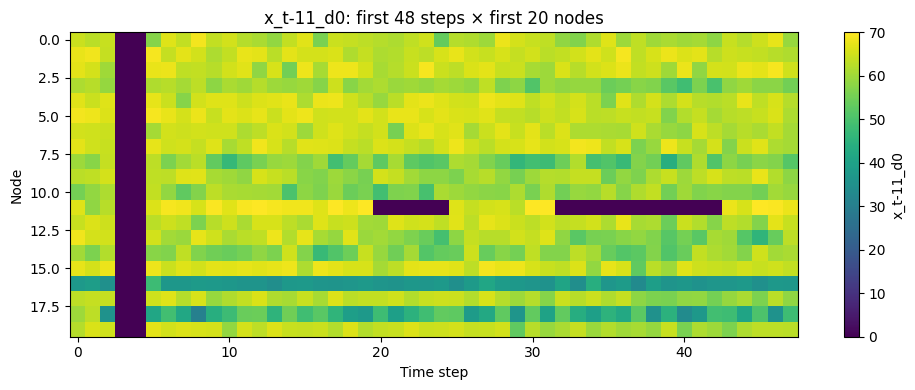

In [32]:
# Heatmap of a small slice (time × nodes)
slice_t = 48
slice_n = 20
Y_slice = Y.iloc[:slice_t, :slice_n]
plt.figure(figsize=(10, 4))
plt.imshow(Y_slice.T, aspect="auto", cmap="viridis")
plt.colorbar(label=TARGET_COL)
plt.xlabel("Time step")
plt.ylabel("Node")
plt.title(f"{TARGET_COL}: first {slice_t} steps × first {slice_n} nodes")
plt.tight_layout()
plt.show()

# Headmap analysis
Vertical band (time step 3–4): Dark purple across almost all nodes → very low values at the same time. Could be:
Shared event (e.g., congestion, incident)
Sensor or data issue
Late-night or off-peak period

Horizontal bands (nodes 11–12, around steps 20–25 and 33–42): Dark purple for specific nodes over several steps → low values for those nodes only. Suggests:
Node-specific problems (e.g., sensor faults)
Local traffic differences

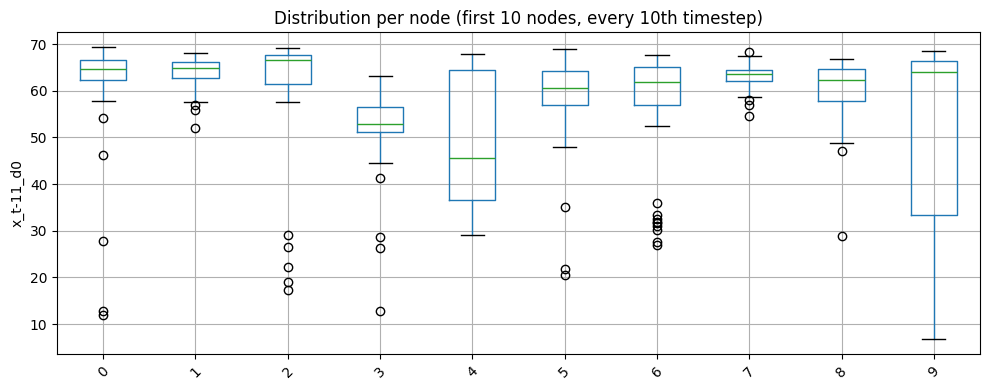

In [33]:
# Box plot: Distribution per node for first 10 nodes (sample of timesteps for speed)
n_nodes_show = 10
Y.iloc[::10, :n_nodes_show].boxplot(figsize=(10, 4))
plt.xticks(rotation=45)
plt.ylabel(TARGET_COL)
plt.title(f"Distribution per node (first {n_nodes_show} nodes, every 10th timestep)")
plt.tight_layout()
plt.show()

Different distributions per node:
Nodes 0, 1, 2, 7: median ~64–67, narrow IQR
Node 4: median ~45, wide IQR (about 35–60)
Node 3: lower median (~53)
Outliers: Low values in several nodes (e.g., node 9 with very low outliers). Possible causes:
Congestion (if this is speed)
Sensor errors
True low-traffic periods
Per-node scale: Values and variability differ across nodes, which supports per-node normalization (e.g., fit_node_standardizer) and possibly node-specific modeling.

# Model Development

In [34]:
import random
from dataclasses import dataclass
from typing import Dict, Tuple

import numpy as np
import pandas as pd

from sklearn.linear_model import Ridge

import torch
import torch.nn as nn
from torch.utils.data import TensorDataset, DataLoader

print("torch:", torch.__version__)
print("device available:", "cuda" if torch.cuda.is_available() else "cpu")

torch: 2.6.0+cu124
device available: cuda


In [35]:
@dataclass
class Config:
    # data / split
    dataset_id: str = "witgaw/METR-LA"
    target_col = "x_t-11_d0"
    time_col = "t0_timestamp"
    node_col = "node_id"

    # windowing
    W: int = 12                 # input window length (e.g., 12*5min=60min history)
    H: int = 12                 # forecast horizon (e.g., 12*5min=60min ahead)
    stride: int = 1

    # split fractions on time axis
    train_frac: float = 0.70
    val_frac: float = 0.10      # test_frac = 1 - train - val

    # training
    seed: int = 42
    batch_size: int = 256
    epochs: int = 80
    early_stop_patience: int = 12
    lr: float = 5e-4
    weight_decay: float = 1e-4
    clip_grad_norm: float = 1.0
    use_scheduler: bool = True

    # model sizes
    hidden_sizes: Tuple[int, ...] = (512, 256)
    dropout: float = 0.2
    conv_kernel: int = 3

    # horizon weighting (30–60 min emphasis for 5-min steps: H6..H12)
    use_horizon_weighting: bool = True
    horizon_weight_factor: float = 2.0   # weight multiplier for later horizons
    horizon_weight_start_index: int = 5  # 0-based: 5 means H6

CFG = Config()
CFG

Config(dataset_id='witgaw/METR-LA', W=12, H=12, stride=1, train_frac=0.7, val_frac=0.1, seed=42, batch_size=256, epochs=80, early_stop_patience=12, lr=0.0005, weight_decay=0.0001, clip_grad_norm=1.0, use_scheduler=True, hidden_sizes=(512, 256), dropout=0.2, conv_kernel=3, use_horizon_weighting=True, horizon_weight_factor=2.0, horizon_weight_start_index=5)

In [36]:
# Reproducibility
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

def seed_everything(seed: int = 42):
    random.seed(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)
    if torch.cuda.is_available():
        torch.cuda.manual_seed_all(seed)
    torch.backends.cudnn.deterministic = True
    torch.backends.cudnn.benchmark = False

seed_everything(CFG.seed)

def describe_matrix(name: str, arr: np.ndarray):
    print(f"{name}: shape={arr.shape}, dtype={arr.dtype}, "
          f"min={np.nanmin(arr):.3f}, max={np.nanmax(arr):.3f}, mean={np.nanmean(arr):.3f}")

In [37]:
ds = load_dataset(CFG.dataset_id)

# Expect these keys for this dataset; if not, adjust accordingly.
print("available splits:", list(ds.keys()))

df_train = ds["train"].to_pandas()
df_val   = ds["validation"].to_pandas() if "validation" in ds else ds["val"].to_pandas()
df_test  = ds["test"].to_pandas()

print("df_train:", df_train.shape, "| df_val:", df_val.shape, "| df_test:", df_test.shape)
df_train.head()


available splits: ['train', 'validation', 'test']
df_train: (4962618, 50) | df_val: (708975, 50) | df_test: (1417950, 50)


,node_id,t0_timestamp,x_t-11_d0,x_t-11_d1,x_t-10_d0,x_t-10_d1,x_t-9_d0,x_t-9_d1,x_t-8_d0,x_t-8_d1,x_t-7_d0,x_t-7_d1,x_t-6_d0,x_t-6_d1,x_t-5_d0,x_t-5_d1,x_t-4_d0,x_t-4_d1,x_t-3_d0,x_t-3_d1,x_t-2_d0,x_t-2_d1,x_t-1_d0,x_t-1_d1,x_t+0_d0,x_t+0_d1,y_t+1_d0,y_t+1_d1,y_t+2_d0,y_t+2_d1,y_t+3_d0,y_t+3_d1,y_t+4_d0,y_t+4_d1,y_t+5_d0,y_t+5_d1,y_t+6_d0,y_t+6_d1,y_t+7_d0,y_t+7_d1,y_t+8_d0,y_t+8_d1,y_t+9_d0,y_t+9_d1,y_t+10_d0,y_t+10_d1,y_t+11_d0,y_t+11_d1,y_t+12_d0,y_t+12_d1
0,0,2012-03-01T00:55:00,64.375,0.0,62.666667,0.003472,64.00,0.006944,0.0,0.010417,0.0,0.013889,57.333333,0.017361,66.500,0.020833,63.625,0.024306,68.750,0.027778,63.500,0.03125,65.222222,0.034722,62.250,0.038194,61.125,0.041667,58.555556,0.045139,63.625,0.048611,66.777778,0.052083,55.875,0.055556,64.333333,0.059028,63.888889,0.0625,63.125,0.065972,62.125,0.069444,61.500,0.072917,63.222222,0.076389,65.000,0.079861
1,1,2012-03-01T00:55:00,67.625,0.0,68.555556,0.003472,63.75,0.006944,0.0,0.010417,0.0,0.013889,69.000000,0.017361,63.875,0.020833,67.250,0.024306,65.250,0.027778,61.500,0.03125,63.666667,0.034722,67.750,0.038194,67.000,0.041667,62.666667,0.045139,67.000,0.048611,65.555556,0.052083,65.500,0.055556,66.000000,0.059028,61.555556,0.0625,63.875,0.065972,61.250,0.069444,62.000,0.072917,64.111111,0.076389,63.000,0.079861
2,2,2012-03-01T00:55:00,67.125,0.0,65.444444,0.003472,60.00,0.006944,0.0,0.010417,0.0,0.013889,67.666667,0.017361,67.875,0.020833,63.250,0.024306,63.500,0.027778,62.500,0.03125,65.111111,0.034722,66.875,0.038194,58.500,0.041667,65.777778,0.045139,55.000,0.048611,68.111111,0.052083,60.750,0.055556,68.222222,0.059028,68.111111,0.0625,65.375,0.065972,60.750,0.069444,62.125,0.072917,64.333333,0.076389,69.000,0.079861
3,3,2012-03-01T00:55:00,61.500,0.0,62.444444,0.003472,59.00,0.006944,0.0,0.010417,0.0,0.013889,61.666667,0.017361,62.375,0.020833,60.500,0.024306,63.000,0.027778,58.125,0.03125,61.111111,0.034722,60.000,0.038194,62.250,0.041667,59.777778,0.045139,59.125,0.048611,59.888889,0.052083,57.250,0.055556,64.777778,0.059028,57.666667,0.0625,60.250,0.065972,61.375,0.069444,59.375,0.072917,59.888889,0.076389,58.875,0.079861
4,4,2012-03-01T00:55:00,66.875,0.0,64.444444,0.003472,66.50,0.006944,0.0,0.010417,0.0,0.013889,67.333333,0.017361,64.375,0.020833,57.375,0.024306,65.125,0.027778,66.625,0.03125,66.555556,0.034722,64.750,0.038194,66.375,0.041667,66.888889,0.045139,67.625,0.048611,61.333333,0.052083,67.875,0.055556,68.333333,0.059028,65.000000,0.0625,62.500,0.065972,59.125,0.069444,62.625,0.072917,67.000000,0.076389,67.875,0.079861


In [38]:
def pivot_to_matrix(df: pd.DataFrame, split_name: str) -> pd.DataFrame:
    # Basic schema checks
    for col in [CFG.time_col, CFG.node_col, CFG.target_col]:
        if col not in df.columns:
            raise ValueError(f"[{split_name}] Missing expected column '{col}'. Update Config to match dataset schema.")
    # Ensure datetime + sort
    df = df.copy()
    df[CFG.time_col] = pd.to_datetime(df[CFG.time_col])
    df = df.sort_values(CFG.time_col)

    # Integrity: unique (timestamp, node)
    dup = df.duplicated(subset=[CFG.time_col, CFG.node_col]).sum()
    if dup:
        print(f"[{split_name}] duplicate (timestamp,node) rows:", dup)

    missing = df[CFG.target_col].isna().mean()
    print(f"[{split_name}] missing target fraction: {missing:.6f}")

    Y = df.pivot(index=CFG.time_col, columns=CFG.node_col, values=CFG.target_col).sort_index()
    print(f"[{split_name}] Y shape: {Y.shape} (T,N)")
    return Y

Y_train_df = pivot_to_matrix(df_train, "train")
Y_val_df   = pivot_to_matrix(df_val,   "validation")
Y_test_df  = pivot_to_matrix(df_test,  "test")

# Align columns across splits (defensive; they should match for METR-LA)
common_cols = sorted(set(Y_train_df.columns) & set(Y_val_df.columns) & set(Y_test_df.columns))
if len(common_cols) != len(Y_train_df.columns):
    print("Warning: column mismatch across splits. Using intersection:", len(common_cols))

Y_train_df = Y_train_df[common_cols]
Y_val_df   = Y_val_df[common_cols]
Y_test_df  = Y_test_df[common_cols]

print("Aligned shapes:", Y_train_df.shape, Y_val_df.shape, Y_test_df.shape)
Y_train_df.head()


[train] missing target fraction: 0.000000
[train] Y shape: (23974, 207) (T,N)
[validation] missing target fraction: 0.000000
[validation] Y shape: (3425, 207) (T,N)
[test] missing target fraction: 0.000000
[test] Y shape: (6850, 207) (T,N)
Aligned shapes: (23974, 207) (3425, 207) (6850, 207)


node_id,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,...,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206
t0_timestamp,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2012-03-01 00:55:00,64.375000,67.625000,67.125000,61.500000,66.875000,68.750000,65.125,67.125,59.625000,62.750000,55.500000,66.500000,64.250000,68.500000,60.375000,67.500000,37.75,63.125000,59.750000,62.125000,67.250000,41.250000,54.625000,58.125000,65.125000,64.250000,61.250000,62.750000,66.875000,47.375000,57.000000,67.750000,65.125,66.875000,64.000000,62.000000,64.375,60.750000,60.750,62.375000,64.500000,66.000000,62.000000,64.875000,55.875000,67.750000,63.000000,60.125000,60.250000,62.250000,42.250000,48.250000,65.125,63.500,55.750000,60.500000,51.571429,60.250000,63.875000,59.875000,64.625000,64.000000,52.500000,66.250000,68.250000,68.875000,66.375000,64.500000,67.875000,67.250000,63.125000,66.250000,64.625000,59.125000,68.250000,52.250000,58.125000,61.250000,66.125000,69.375000,69.750000,63.500000,64.25,68.000,56.875000,64.375000,65.250000,65.750000,61.250000,63.625000,67.000000,55.250000,66.875000,65.375,65.125000,57.625000,69.125000,66.500000,62.000000,67.375000,...,66.875000,63.625000,55.750000,67.375000,65.750000,63.125000,66.000000,68.625,61.500000,67.125000,69.250000,65.375000,68.375000,61.375000,53.750000,65.250000,69.375000,62.125,50.125000,61.750000,66.875000,67.125000,58.50,66.125000,66.375000,65.750000,61.750000,67.250000,65.000000,66.375000,63.875000,67.875000,63.625000,57.625,64.625000,59.750000,63.500000,58.125000,66.750000,66.250000,60.625000,63.750000,69.50,61.250000,53.125,61.375000,63.125000,63.000,63.375,54.750000,65.125000,64.000000,67.375000,67.125000,68.250000,67.625000,69.375000,65.500,55.000,70.000000,68.250000,62.000000,64.500000,58.375000,64.500000,63.625000,63.750000,53.625000,69.875000,64.750000,62.375000,64.750000,52.125000,61.625000,63.000000,67.142857,67.625000,63.875000,63.125000,63.375000,64.125000,66.875000,69.875,67.750000,62.000000,66.750000,57.625000,52.625000,69.000000,43.500000,45.625000,65.500,64.500000,66.428571,66.875,59.375000,69.000000,59.250000,69.000000,61.875
2012-03-01 01:00:00,62.666667,68.555556,65.444444,62.444444,64.444444,68.111111,65.000,65.000,57.444444,63.333333,58.777778,58.444444,66.444444,65.444444,56.111111,65.444444,39.00,63.777778,63.111111,66.111111,65.777778,56.777778,50.777778,56.222222,66.888889,54.444444,67.888889,61.555556,67.555556,46.777778,67.777778,67.888889,68.000,67.444444,66.444444,67.222222,63.000,64.333333,64.000,61.888889,66.777778,64.555556,64.444444,64.333333,66.444444,64.111111,58.888889,65.222222,60.333333,63.111111,52.333333,52.111111,68.000,56.000,60.888889,60.222222,44.444444,61.222222,62.333333,57.777778,62.111111,69.444444,34.666667,65.777778,67.111111,67.555556,57.888889,66.777778,65.555556,68.222222,63.333333,62.333333,67.777778,61.888889,67.777778,54.666667,46.111111,61.333333,68.111111,64.888889,66.777778,64.777778,66.00,64.000,59.777778,65.333333,66.888889,65.222222,61.777778,66.444444,65.888889,56.777778,69.444444,67.000,65.777778,57.444444,69.555556,69.111111,59.555556,67.333333,...,67.333333,57.888889,60.555556,63.555556,68.111111,57.777778,67.777778,65.000,62.777778,68.444444,69.555556,62.555556,66.333333,58.111111,54.666667,67.

In [39]:
print("time ranges:")
print("  train:", Y_train_df.index.min(), "->", Y_train_df.index.max())
print("  val  :", Y_val_df.index.min(),   "->", Y_val_df.index.max())
print("  test :", Y_test_df.index.min(),  "->", Y_test_df.index.max())


time ranges:
  train: 2012-03-01 00:55:00 -> 2012-05-23 06:40:00
  val  : 2012-05-23 06:45:00 -> 2012-06-04 04:05:00
  test : 2012-06-04 04:10:00 -> 2012-06-27 22:55:00


In [40]:
# Per-node normalization (train-only statistics)
def fit_node_standardizer(Y_train_df: pd.DataFrame):
    train_arr = Y_train_df.values.astype(np.float32)
    mu = np.nanmean(train_arr, axis=0)          # [N]
    sigma = np.nanstd(train_arr, axis=0)        # [N]
    sigma = np.where(sigma < 1e-6, 1.0, sigma)
    return mu.astype(np.float32), sigma.astype(np.float32)

def apply_node_standardizer(Y_df: pd.DataFrame, mu: np.ndarray, sigma: np.ndarray) -> np.ndarray:
    arr = Y_df.values.astype(np.float32)
    return (arr - mu) / sigma

mu_node, sigma_node = fit_node_standardizer(Y_train_df)
Z_train = apply_node_standardizer(Y_train_df, mu_node, sigma_node)
Z_val   = apply_node_standardizer(Y_val_df,   mu_node, sigma_node)
Z_test  = apply_node_standardizer(Y_test_df,  mu_node, sigma_node)

describe_matrix("Z_train", Z_train)
describe_matrix("Z_val", Z_val)
describe_matrix("Z_test", Z_test)

Z_train: shape=(23974, 207), dtype=float32, min=-4.072, max=4.578, mean=0.000
Z_val: shape=(3425, 207), dtype=float32, min=-4.072, max=4.578, mean=0.022
Z_test: shape=(6850, 207), dtype=float32, min=-4.072, max=4.578, mean=-0.204


## Windowing: build modeling tensors X[t] and y[t]

- `X`: shape `[S, W, N]`
- `y`: shape `[S, H, N]`

This is used by all ML/DL models (Ridge may flatten internally).

In [41]:
def make_windows(Z: np.ndarray, W: int, H: int, stride: int = 1) -> Tuple[np.ndarray, np.ndarray]:
    T, N = Z.shape
    X, y = [], []
    for t in range(0, T - W - H + 1, stride):
        X.append(Z[t:t+W])
        y.append(Z[t+W:t+W+H])
    X = np.stack(X).astype(np.float32)  # [S,W,N]
    y = np.stack(y).astype(np.float32)  # [S,H,N]
    return X, y

X_train, y_train = make_windows(Z_train, CFG.W, CFG.H, CFG.stride)
X_val,   y_val   = make_windows(Z_val,   CFG.W, CFG.H, CFG.stride)
X_test,  y_test  = make_windows(Z_test,  CFG.W, CFG.H, CFG.stride)

print("X_train,y_train:", X_train.shape, y_train.shape)
print("X_val,y_val    :", X_val.shape, y_val.shape)
print("X_test,y_test  :", X_test.shape, y_test.shape)

X_train,y_train: (23951, 12, 207) (23951, 12, 207)
X_val,y_val    : (3402, 12, 207) (3402, 12, 207)
X_test,y_test  : (6827, 12, 207) (6827, 12, 207)


## Metrics and analysis helpers

We evaluate:
- overall MAE / RMSE (unweighted, for fair comparisons)
- horizon MAE at key steps (H1/H4/H7/H12 if available)
- worst nodes by MAE (to detect sensors dominating error)

In [42]:
def compute_metrics(y_hat: np.ndarray, y_true: np.ndarray) -> Dict:
    mae = float(np.mean(np.abs(y_hat - y_true)))
    rmse = float(np.sqrt(np.mean((y_hat - y_true) ** 2)))

    H = y_true.shape[1]
    # key horizons: 1,4,7,12 if possible; else spread
    key = [0, 3, 6, H-1] if H >= 12 else sorted(set([0, H//3, 2*H//3, H-1]))
    horizon_mae = {f"H{h+1}": float(np.mean(np.abs(y_hat[:, h, :] - y_true[:, h, :]))) for h in key}

    node_mae = np.mean(np.abs(y_hat - y_true), axis=(0, 1))   # [N]
    worst_nodes = np.argsort(-node_mae)[:10]
    worst_vals = node_mae[worst_nodes]

    return {
        "MAE": mae,
        "RMSE": rmse,
        **horizon_mae,
        "worst_nodes": worst_nodes.tolist(),
        "worst_node_mae_top": float(worst_vals[0]),
    }

def print_horizon_compare(y_hat_model, y_hat_persist, y_true):
    H = y_true.shape[1]
    key = [0, 3, 6, H-1] if H >= 12 else sorted(set([0, H//3, 2*H//3, H-1]))
    for h in key:
        p = float(np.mean(np.abs(y_hat_persist[:, h, :] - y_true[:, h, :])))
        m = float(np.mean(np.abs(y_hat_model[:, h, :] - y_true[:, h, :])))
        print(f"H{h+1}: persist={p:.3f}  model={m:.3f}")

# Baseline #1: Naive persistence - Predict that each future horizon equals the last observed value.


In [43]:
def forecast_persistence(X: np.ndarray, H: int) -> np.ndarray:
    return np.repeat(X[:, -1:, :], H, axis=1)  # [S,H,N]

y_hat_persist_val = forecast_persistence(X_val, CFG.H)
m_persist = compute_metrics(y_hat_persist_val, y_val)
print("Persistence:", m_persist)

Persistence: {'MAE': 0.2703072130680084, 'RMSE': 0.6490310430526733, 'H1': 0.1553422063589096, 'H4': 0.23009389638900757, 'H7': 0.28565576672554016, 'H12': 0.3606295585632324, 'worst_nodes': [62, 30, 165, 51, 5, 63, 72, 25, 15, 4], 'worst_node_mae_top': 0.41067811846733093}


# Baseline2: Autoregressive Ridge (rolled out): Train 1-step model and roll out for H steps (accumulates error).

In [44]:
def fit_ridge_one_step(X_train: np.ndarray, y_train: np.ndarray, alpha: float = 1.0):
    # X_train: [S,W,N], y_train: [S,H,N] -> use y_train[:,0,:] for 1-step
    S, W, N = X_train.shape
    X_flat = X_train.reshape(S, W*N)
    y1 = y_train[:, 0, :]  # [S,N]
    model = Ridge(alpha=alpha)
    model.fit(X_flat, y1)
    return model

def forecast_ridge_autoregressive(model: Ridge, X: np.ndarray, H: int, W: int, N: int) -> np.ndarray:
    # roll out: predict 1-step, append, repeat
    S = X.shape[0]
    state = X.copy()  # [S,W,N]
    preds = []
    for h in range(H):
        x_flat = state.reshape(S, W*N)
        y1 = model.predict(x_flat).astype(np.float32)  # [S,N]
        preds.append(y1)
        # update window
        state = np.concatenate([state[:, 1:, :], y1[:, None, :]], axis=1)
    return np.stack(preds, axis=1)  # [S,H,N]

ridge1 = fit_ridge_one_step(X_train, y_train, alpha=1.0)
y_hat_ridge_val = forecast_ridge_autoregressive(ridge1, X_val, CFG.H, CFG.W, X_val.shape[2])

m_ridge = compute_metrics(y_hat_ridge_val, y_val)
print("AR Ridge:", m_ridge)
print_horizon_compare(y_hat_ridge_val, y_hat_persist_val, y_val)

AR Ridge: {'MAE': 0.3251803517341614, 'RMSE': 0.6002004146575928, 'H1': 0.19034641981124878, 'H4': 0.28869733214378357, 'H7': 0.3470163941383362, 'H12': 0.4107136130332947, 'worst_nodes': [0, 181, 165, 62, 96, 180, 38, 5, 63, 205], 'worst_node_mae_top': 0.5289216041564941}
H1: persist=0.155  model=0.190
H4: persist=0.230  model=0.289
H7: persist=0.286  model=0.347
H12: persist=0.361  model=0.411


# Deep learning components (models + losses + training loop)

In [45]:
def make_loaders(X_train, y_train, X_val, y_val, batch_size=256):
    train_ds = TensorDataset(torch.tensor(X_train, dtype=torch.float32),
                             torch.tensor(y_train, dtype=torch.float32))
    val_ds   = TensorDataset(torch.tensor(X_val, dtype=torch.float32),
                             torch.tensor(y_val, dtype=torch.float32))
    train_loader = DataLoader(train_ds, batch_size=batch_size, shuffle=True, drop_last=False)
    val_loader   = DataLoader(val_ds, batch_size=batch_size, shuffle=False, drop_last=False)
    return train_loader, val_loader

train_loader, val_loader = make_loaders(X_train, y_train, X_val, y_val, CFG.batch_size)

def train_one_epoch(model, loader, loss_fn, opt):
    model.train()
    for xb, yb in loader:
        xb = xb.to(device)
        yb = yb.to(device)
        opt.zero_grad()
        pred = model(xb)
        loss = loss_fn(pred, yb)
        loss.backward()
        nn.utils.clip_grad_norm_(model.parameters(), CFG.clip_grad_norm)
        opt.step()

def evaluate(model, loader, loss_fn):
    model.eval()
    total, n = 0.0, 0
    with torch.no_grad():
        for xb, yb in loader:
            xb = xb.to(device)
            yb = yb.to(device)
            pred = model(xb)
            loss = loss_fn(pred, yb)
            total += loss.item() * xb.size(0)
            n += xb.size(0)
    return total / max(n, 1)

def fit_torch_model(model, train_loader, val_loader, loss_fn,
                    lr=5e-4, weight_decay=1e-4,
                    epochs=80, early_stop_patience=12,
                    use_scheduler=True):
    model = model.to(device)
    loss_fn = loss_fn.to(device) if isinstance(loss_fn, nn.Module) else loss_fn

    opt = torch.optim.AdamW(model.parameters(), lr=lr, weight_decay=weight_decay)
    scheduler = None
    if use_scheduler:
        scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(opt, mode="min", factor=0.5, patience=3)

    best_val = float("inf")
    best_state = None
    bad = 0

    for ep in range(1, epochs + 1):
        train_one_epoch(model, train_loader, loss_fn, opt)
        val_loss = evaluate(model, val_loader, loss_fn)
        if scheduler is not None:
            scheduler.step(val_loss)

        lr_now = opt.param_groups[0]["lr"]
        print(f"Epoch {ep:02d} | val loss: {val_loss:.4f} | lr: {lr_now:.2e}")

        if val_loss < best_val - 1e-4:
            best_val = val_loss
            best_state = {k: v.detach().cpu().clone() for k, v in model.state_dict().items()}
            bad = 0
        else:
            bad += 1
            if bad >= early_stop_patience:
                print("Early stopping.")
                break

    if best_state is not None:
        model.load_state_dict(best_state)
    return model

def predict_all(model, X, batch_size=512):
    model.eval()
    ds = TensorDataset(torch.tensor(X, dtype=torch.float32))
    loader = DataLoader(ds, batch_size=batch_size, shuffle=False)
    preds = []
    with torch.no_grad():
        for (xb,) in loader:
            xb = xb.to(device)
            preds.append(model(xb).cpu().numpy())
    return np.concatenate(preds, axis=0)

In [46]:
class HorizonWeightedMAE(nn.Module):
    def __init__(self, H: int, weights: np.ndarray):
        super().__init__()
        w = torch.tensor(weights, dtype=torch.float32)
        self.register_buffer("w", w.view(1, H, 1))  # [1,H,1]
    def forward(self, pred, target):
        return (torch.abs(pred - target) * self.w).mean()

def build_horizon_weights(H: int, start_index: int, factor: float) -> np.ndarray:
    w = np.ones(H, dtype=np.float32)
    if start_index < H:
        w[start_index:] = factor
    return w

weights = build_horizon_weights(CFG.H, CFG.horizon_weight_start_index, CFG.horizon_weight_factor)
weights

array([1., 1., 1., 1., 1., 2., 2., 2., 2., 2., 2., 2.], dtype=float32)

# Deep models

We define a small ladder:
- `MLPDirectForecaster` (classic MLP baseline)
- `ResidualMLPForecaster` (predict deviations from persistence)
- `ConvResidualMLP` (Conv1D + residual learning)

In [47]:
class MLPDirectForecaster(nn.Module):
    def __init__(self, W, N, H, hidden_sizes=(512,256), dropout=0.2):
        super().__init__()
        self.W, self.N, self.H = W, N, H
        in_dim = W*N
        out_dim = H*N
        layers = []
        prev = in_dim
        for hs in hidden_sizes:
            layers += [nn.Linear(prev, hs), nn.ReLU(), nn.Dropout(dropout)]
            prev = hs
        layers += [nn.Linear(prev, out_dim)]
        self.net = nn.Sequential(*layers)

    def forward(self, x):
        b = x.shape[0]
        y = self.net(x.reshape(b, -1)).reshape(b, self.H, self.N)
        return y

class ResidualMLPForecaster(nn.Module):
    def __init__(self, W, N, H, hidden_sizes=(512,256), dropout=0.2):
        super().__init__()
        self.W, self.N, self.H = W, N, H
        in_dim = W*N
        out_dim = H*N
        layers = []
        prev = in_dim
        for hs in hidden_sizes:
            layers += [nn.Linear(prev, hs), nn.ReLU(), nn.Dropout(dropout)]
            prev = hs
        layers += [nn.Linear(prev, out_dim)]
        self.net = nn.Sequential(*layers)

    def forward(self, x):
        b = x.shape[0]
        last = x[:, -1, :]   # persistence baseline in normalized space
        delta = self.net(x.reshape(b, -1)).reshape(b, self.H, self.N)
        return last.unsqueeze(1) + delta

class ConvResidualMLP(nn.Module):
    def __init__(self, W, N, H, hidden_sizes=(512,256), dropout=0.2, kernel_size=3):
        super().__init__()
        self.W, self.N, self.H = W, N, H
        self.conv = nn.Conv1d(N, N, kernel_size=kernel_size, padding=kernel_size//2)

        in_dim = W*N
        out_dim = H*N
        layers = []
        prev = in_dim
        for hs in hidden_sizes:
            layers += [nn.Linear(prev, hs), nn.ReLU(), nn.Dropout(dropout)]
            prev = hs
        layers += [nn.Linear(prev, out_dim)]
        self.mlp = nn.Sequential(*layers)

    def forward(self, x):
        b = x.shape[0]
        last = x[:, -1, :]

        x = x.permute(0, 2, 1)      # [B,N,W]
        x = self.conv(x)
        x = x.permute(0, 2, 1)      # [B,W,N]

        delta = self.mlp(x.reshape(b, -1)).reshape(b, self.H, self.N)
        return last.unsqueeze(1) + delta

# Experiment 

In [48]:
def run_experiment(name: str, model: nn.Module, loss_fn: nn.Module) -> Dict:
    print("\n" + "="*80)
    print("EXPERIMENT:", name)
    model = fit_torch_model(
        model,
        train_loader,
        val_loader,
        loss_fn,
        lr=CFG.lr,
        weight_decay=CFG.weight_decay,
        epochs=CFG.epochs,
        early_stop_patience=CFG.early_stop_patience,
        use_scheduler=CFG.use_scheduler
    )
    y_hat = predict_all(model, X_val)
    metrics = compute_metrics(y_hat, y_val)
    metrics["model"] = name
    # horizon compare vs persistence
    print("Unweighted metrics:", {k: metrics[k] for k in metrics if k in ["MAE","RMSE","H1","H4","H7",f"H{CFG.H}"]})
    print_horizon_compare(y_hat, y_hat_persist_val, y_val)
    return metrics, model

W, N, H = X_train.shape[1], X_train.shape[2], y_train.shape[1]

loss_unweighted = nn.L1Loss()
loss_weighted = HorizonWeightedMAE(H, weights=weights) if CFG.use_horizon_weighting else nn.L1Loss()

experiments = [
    ("MLP_direct_unweighted", MLPDirectForecaster(W,N,H, CFG.hidden_sizes, CFG.dropout), loss_unweighted),
    ("ResidualMLP_unweighted", ResidualMLPForecaster(W,N,H, CFG.hidden_sizes, CFG.dropout), loss_unweighted),
    ("ConvResidualMLP_weighted", ConvResidualMLP(W,N,H, CFG.hidden_sizes, CFG.dropout, CFG.conv_kernel), loss_weighted),
]

results = []
models = {}

for name, model, loss_fn in experiments:
    m, fitted = run_experiment(name, model, loss_fn)
    results.append(m)
    models[name] = fitted

results_df = pd.DataFrame(results)

# Add baselines into same table view (val)
baseline_rows = [
    {"model":"Persistence", **m_persist},
    {"model":"AR_Ridge", **m_ridge},
]
results_df = pd.concat([pd.DataFrame(baseline_rows), results_df], ignore_index=True)

# Display clean summary (sort by MAE)
cols = ["model","MAE","RMSE"]
for k in ["H1","H4","H7",f"H{CFG.H}"]:
    if k in results_df.columns: cols.append(k)
cols += ["worst_node_mae_top"]

results_df[cols].sort_values("MAE")


EXPERIMENT: MLP_direct_unweighted
Epoch 01 | val loss: 0.3368 | lr: 5.00e-04
Epoch 02 | val loss: 0.3209 | lr: 5.00e-04
Epoch 03 | val loss: 0.3241 | lr: 5.00e-04
Epoch 04 | val loss: 0.3105 | lr: 5.00e-04
Epoch 05 | val loss: 0.3045 | lr: 5.00e-04
Epoch 06 | val loss: 0.2994 | lr: 5.00e-04
Epoch 07 | val loss: 0.2989 | lr: 5.00e-04
Epoch 08 | val loss: 0.2961 | lr: 5.00e-04
Epoch 09 | val loss: 0.2989 | lr: 5.00e-04
Epoch 10 | val loss: 0.2937 | lr: 5.00e-04
Epoch 11 | val loss: 0.2933 | lr: 5.00e-04
Epoch 12 | val loss: 0.2877 | lr: 5.00e-04
Epoch 13 | val loss: 0.2924 | lr: 5.00e-04
Epoch 14 | val loss: 0.2877 | lr: 5.00e-04
Epoch 15 | val loss: 0.2841 | lr: 5.00e-04
Epoch 16 | val loss: 0.2904 | lr: 5.00e-04
Epoch 17 | val loss: 0.2871 | lr: 5.00e-04
Epoch 18 | val loss: 0.2852 | lr: 5.00e-04
Epoch 19 | val loss: 0.2893 | lr: 2.50e-04
Epoch 20 | val loss: 0.2864 | lr: 2.50e-04
Epoch 21 | val loss: 0.2905 | lr: 2.50e-04
Epoch 22 | val loss: 0.2798 | lr: 2.50e-04
Epoch 23 | val loss

,model,MAE,RMSE,H1,H4,H7,H12,worst_node_mae_top
4,ConvResidualMLP_weighted,0.264378,0.630578,0.155578,0.228990,0.280636,0.344612,0.407657
0,Persistence,0.270307,0.649031,0.155342,0.230094,0.285656,0.360630,0.410678
3,ResidualMLP_unweighted,0.270319,0.649031,0.155353,0.230106,0.285668,0.360642,0.410685
2,MLP_direct_unweighted,0.279281,0.667442,0.228186,0.257136,0.285450,0.326771,1.251164
1,AR_Ridge,0.325180,0.600200,0.190346,0.288697,0.347016,0.410714,0.528922


In [49]:
best_name = results_df.sort_values("MAE").iloc[0]["model"]
print("Best model by val MAE:", best_name)

# Choose which model to report as "final"
FINAL_MODEL_NAME = "ConvResidualMLP_weighted" if "ConvResidualMLP_weighted" in models else best_name
final_model = models.get(FINAL_MODEL_NAME, None)
print("Final model used for test:", FINAL_MODEL_NAME)

# Baseline test metrics for reference
y_hat_persist_test = forecast_persistence(X_test, CFG.H)
m_persist_test = compute_metrics(y_hat_persist_test, y_test)
print("Persistence test:", m_persist_test)

if final_model is not None:
    y_hat_test = predict_all(final_model, X_test)
    m_test = compute_metrics(y_hat_test, y_test)
    print("Final model test metrics:", m_test)
    print_horizon_compare(y_hat_test, y_hat_persist_test, y_test)
else:
    print("Final model not trained in this session.")

Best model by val MAE: ConvResidualMLP_weighted
Final model used for test: ConvResidualMLP_weighted
Persistence test: {'MAE': 0.2972439229488373, 'RMSE': 0.7065956592559814, 'H1': 0.1610151082277298, 'H4': 0.2471824586391449, 'H7': 0.31555935740470886, 'H12': 0.40510231256484985, 'worst_nodes': [62, 51, 30, 165, 172, 72, 76, 126, 25, 137], 'worst_node_mae_top': 0.4788593053817749}
Final model test metrics: {'MAE': 0.2928059697151184, 'RMSE': 0.6906173825263977, 'H1': 0.16144028306007385, 'H4': 0.2475937455892563, 'H7': 0.3120623826980591, 'H12': 0.39086446166038513, 'worst_nodes': [62, 51, 30, 165, 72, 172, 76, 126, 25, 5], 'worst_node_mae_top': 0.4791635572910309}
H1: persist=0.161  model=0.161
H4: persist=0.247  model=0.248
H7: persist=0.316  model=0.312
H12: persist=0.405  model=0.391


# Prepare for Tableau Dashboard

In [50]:
from utils import forecast_to_dashboard_df


In [51]:
# Choose a "live" input window (simulate live forecast)
X_latest = X_test[-1:]              # shape [1, W, N]  (z-scale)

final_model.eval()
with torch.no_grad():
    pred_z = final_model(
        torch.tensor(X_latest, dtype=torch.float32).to(device)
    ).cpu().numpy()                 # shape [1, H, N]  (z-scale)

pred_z_NH = pred_z[0].T             # shape [N, H]

# Denormalize per-node (raw units)
pred_raw = pred_z_NH * sigma_node[:, None] + mu_node[:, None]


In [52]:
nodes = Y_test_df.columns.to_numpy()
run_time = pd.Timestamp.now()
last_obs_idx = X_test.shape[0] + CFG.W - 2
last_obs_time = Y_test_df.index[last_obs_idx]


In [53]:
current_z = X_latest[0, -1, :]              # [N] z-scale
current_raw = current_z * sigma_node + mu_node


In [54]:
# y_hat_test, y_test: shape [S, H, N]
# Denormalize to raw units
y_hat_test_raw = y_hat_test * sigma_node[None, None, :] + mu_node[None, None, :]
y_test_raw     = y_test     * sigma_node[None, None, :] + mu_node[None, None, :]
node_expected_mae = np.mean(np.abs(y_hat_test_raw - y_test_raw), axis=(0, 1))

In [55]:
df_dash = forecast_to_dashboard_df(
    pred=pred_raw,
    node_ids=nodes,
    run_time=run_time,
    last_obs_time=last_obs_time,
    current=current_raw,
    node_expected_mae=node_expected_mae,
    wide=False
)


In [56]:
# 1. Top congestion/risk at 60 min
df_congestion = (
    df_dash[df_dash["horizon_minutes"] == 60]
    .assign(
        abs_delta=lambda d: d["delta"].abs(),
        risk=lambda d: d["abs_delta"] / (d["expected_mae_node"] + 1e-6)
    )
    .sort_values("risk", ascending=False)
)

df_congestion.to_csv("dashboard_top_congestion_60min.csv", index=False)


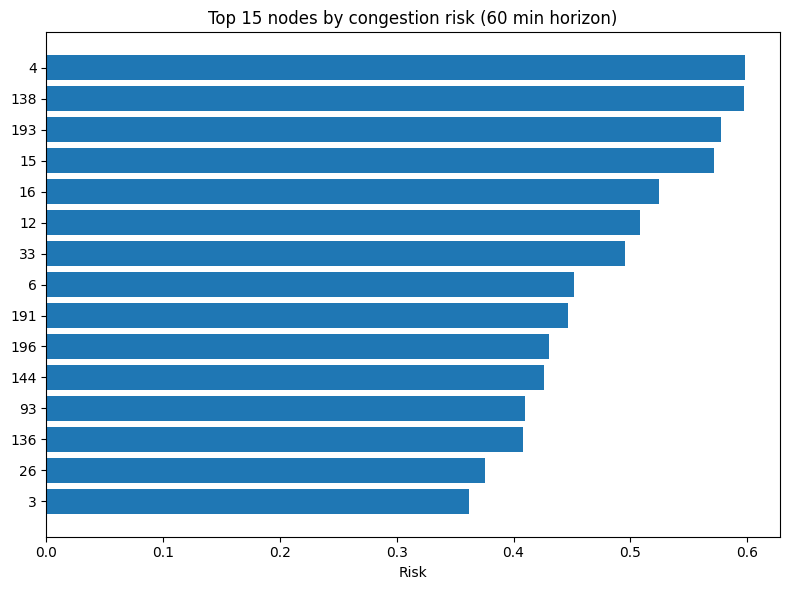

In [57]:
top = df_congestion.head(15)
plt.figure(figsize=(8, 6))
plt.barh(top["node_id"].astype(str), top["risk"])
plt.xlabel("Risk")
plt.title("Top 15 nodes by congestion risk (60 min horizon)")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

In [58]:
# 2. Multi-horizon forecast curves
df_horizon_curves = df_dash.copy()
df_horizon_curves["pred_low"]  = df_horizon_curves["pred"] - df_horizon_curves["expected_mae_node"]
df_horizon_curves["pred_high"] = df_horizon_curves["pred"] + df_horizon_curves["expected_mae_node"]

df_horizon_curves.to_csv("dashboard_horizon_curves.csv", index=False)


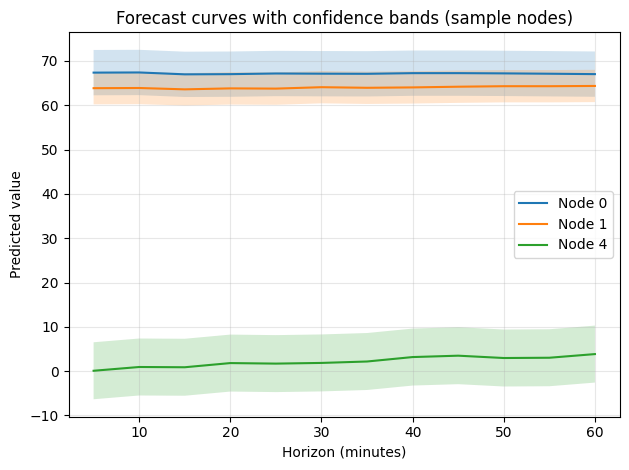

In [59]:
nodes_show = [0, 1, 4]
for nid in nodes_show:
    sub = df_horizon_curves[df_horizon_curves["node_id"] == nid]
    plt.plot(sub["horizon_minutes"], sub["pred"], label=f"Node {nid}")
    plt.fill_between(sub["horizon_minutes"], sub["pred_low"], sub["pred_high"], alpha=0.2)
plt.xlabel("Horizon (minutes)")
plt.ylabel("Predicted value")
plt.title("Forecast curves with confidence bands (sample nodes)")
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

In [60]:
# 3. Node reliability / confidence
df_node_confidence = (
    df_dash[["node_id", "expected_mae_node", "confidence"]]
    .drop_duplicates()
    .sort_values("expected_mae_node")
)

df_node_confidence.to_csv("dashboard_node_confidence.csv", index=False)


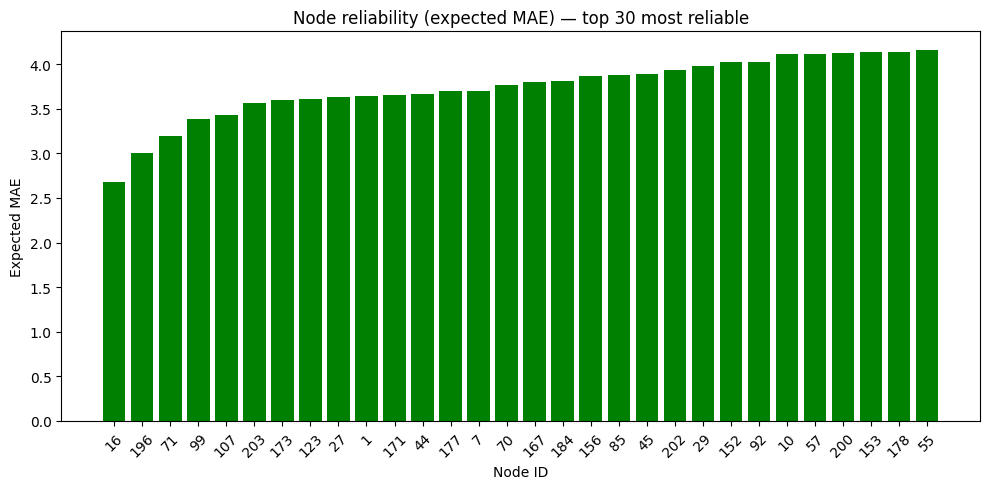

In [61]:
df_top = df_node_confidence.head(30)
plt.figure(figsize=(10, 5))
colors = df_top["confidence"].map({"high": "green", "medium": "orange", "low": "red"})
plt.bar(df_top["node_id"].astype(str), df_top["expected_mae_node"], color=colors)
plt.xlabel("Node ID")
plt.ylabel("Expected MAE")
plt.title("Node reliability (expected MAE) — top 30 most reliable")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [62]:
# 4. Horizon snapshot heatmap (wide)
df_wide = forecast_to_dashboard_df(
    pred=pred_raw,
    node_ids=nodes,
    run_time=run_time,
    last_obs_time=last_obs_time,
    current=current_raw,
    node_expected_mae=node_expected_mae,
    wide=True
)

df_wide.to_csv("dashboard_horizon_snapshot_wide.csv", index=False)


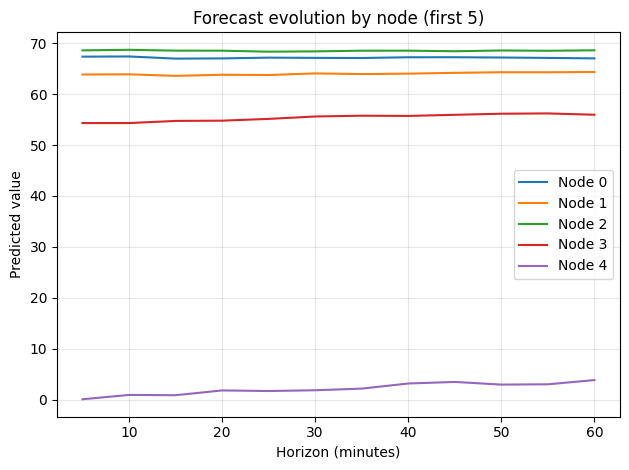

In [64]:
pred_cols = [c for c in df_wide.columns if c.startswith("pred_t+")]
horizons = [5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60]

for i, row in df_wide.head(5).iterrows():
    vals = [row[c] for c in pred_cols]
    plt.plot(horizons, vals, label=f"Node {int(row['node_id'])}")
plt.xlabel("Horizon (minutes)")
plt.ylabel("Predicted value")
plt.title("Forecast evolution by node (first 5)")
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

In [65]:
# Summary KPIs
# From df_congestion

kpis = {
    "n_nodes": len(df_congestion),
    "avg_pred_60min": df_congestion["pred"].mean(),
    "avg_current": df_congestion["current"].mean(),
    "avg_abs_delta": df_congestion["abs_delta"].mean(),
    "n_high_risk": (df_congestion["risk"] > df_congestion["risk"].quantile(0.75)).sum(),
    "avg_expected_mae": df_congestion["expected_mae_node"].mean(),
}
# Optionally save for Tableau
pd.DataFrame([kpis]).to_csv("dashboard_kpis.csv", index=False)

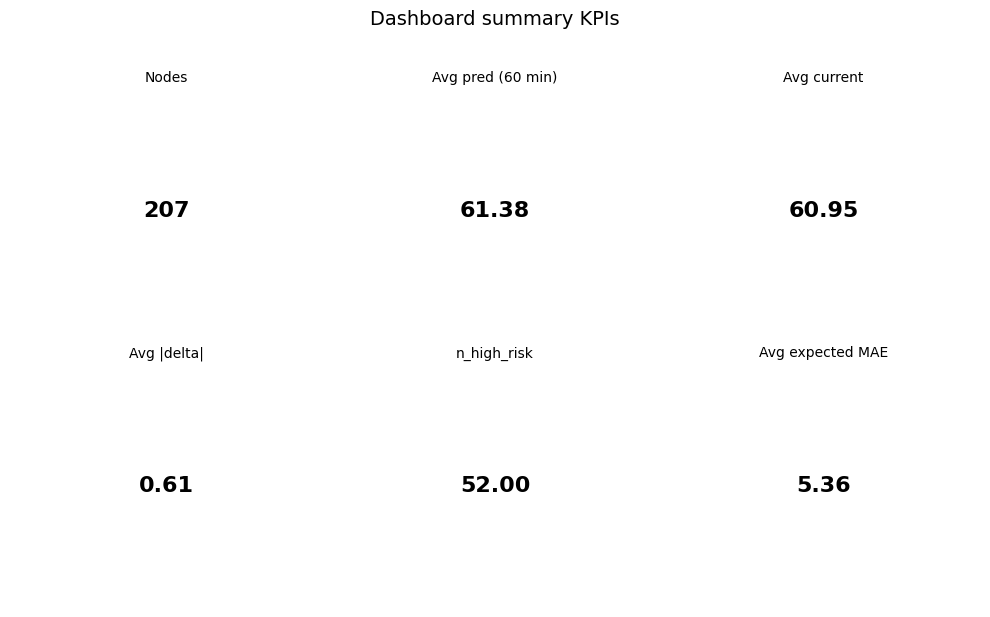

In [70]:
df_kpis = pd.read_csv("dashboard_kpis.csv")

# Map column names to display labels
labels = {
    "avg_pred_60min": "Avg pred (60 min)",
    "avg_current": "Avg current",
    "avg_abs_delta": "Avg |delta|",
    "n_nodes": "Nodes",
    "n_high_risk_top25": "High-risk nodes (top 25%)",
    "avg_expected_mae": "Avg expected MAE",
}

# Get first row if wide format
row = df_kpis.iloc[0]

fig, ax = plt.subplots(2, 3, figsize=(10, 6))
ax = ax.flatten()
for i, col in enumerate(df_kpis.columns):
    if i >= 6:
        break
    val = row[col]
    label = labels.get(col, col)
    ax[i].text(0.5, 0.5,
               f"{val:.2f}" if isinstance(val, (int, float)) and col != "n_nodes" and col != "n_high_risk_top25" else str(int(val)) if isinstance(val, (int, float)) else str(val),
               ha="center", va="center", fontsize=16, fontweight="bold")
    ax[i].set_title(label, fontsize=10)
    ax[i].axis("off")
plt.suptitle("Dashboard summary KPIs", fontsize=14, y=1.02)
plt.tight_layout()
plt.show()

In [67]:
# Current vs 60-min comparison
# From df_dash (long format)
df_60 = df_dash[df_dash["horizon_minutes"] == 60][["node_id", "current", "pred", "delta"]].copy()
df_60 = df_60.rename(columns={"pred": "pred_60min"})
df_60.to_csv("dashboard_current_vs_60min.csv", index=False)

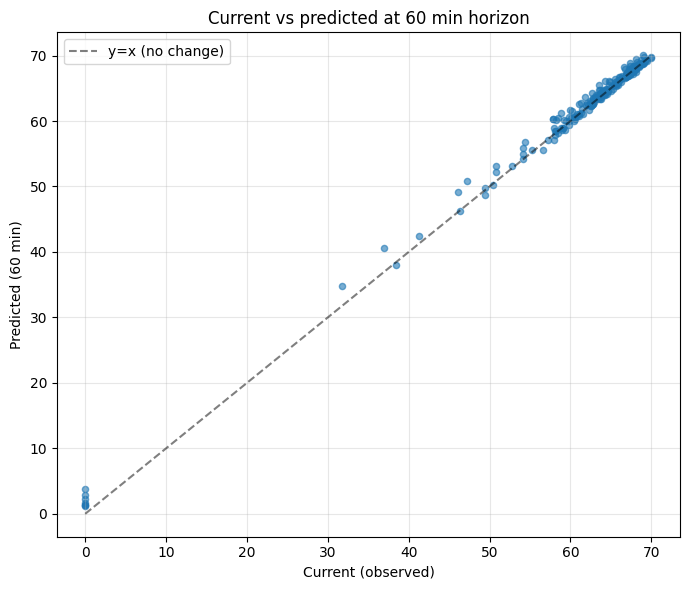

In [71]:
# Scatter: current vs pred_60min
plt.figure(figsize=(7, 6))
plt.scatter(df_60["current"], df_60["pred_60min"], alpha=0.6, s=20)
min_val = min(df_60["current"].min(), df_60["pred_60min"].min())
max_val = max(df_60["current"].max(), df_60["pred_60min"].max())
plt.plot([min_val, max_val], [min_val, max_val], "k--", alpha=0.5, label="y=x (no change)")
plt.xlabel("Current (observed)")
plt.ylabel("Predicted (60 min)")
plt.title("Current vs predicted at 60 min horizon")
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

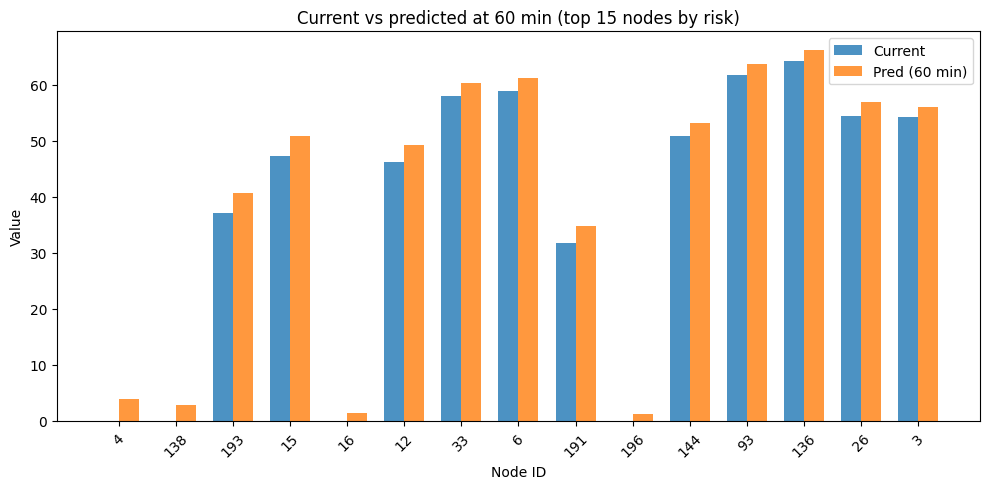

In [ ]:
# Grouped bar: current vs pred for top 15 nodes (Nodes with larger predicted changes )
df = pd.read_csv("dashboard_top_congestion_60min.csv")
top = df.nlargest(15, "risk")
x = range(len(top))
width = 0.35
plt.figure(figsize=(10, 5))
plt.bar([i - width/2 for i in x], top["current"], width, label="Current", alpha=0.8)
plt.bar([i + width/2 for i in x], top["pred"], width, label="Pred (60 min)", alpha=0.8)
plt.xticks(x, top["node_id"].astype(int), rotation=45)
plt.xlabel("Node ID")
plt.ylabel("Value")
plt.title("Current vs predicted at 60 min (top 15 nodes by risk)")
plt.legend()
plt.tight_layout()
plt.show()